In [8]:
from sklearn.manifold import Isomap
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data      # shape (1797, 64)
y = digits.target    # labels



In [9]:
print(digits.data.shape)

# The images themselves
print(digits.images[0])

# The data for use in our algorithms
print(digits.data[0])

# The labels
print(digits.target_names)
print(digits.target_names[3])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 3 4 5 6 7 8 9]
3


Use the unsupervised dimensionality reduction technique called Isomap

In [21]:
isomap = Isomap(n_components=2)

X_reduced = isomap.fit_transform(X) #fit and transform the data in 2 dimensions

/Users/daniele/kerasenv/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/daniele/kerasenv/lib/python3.9/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Reduced dataset shape: (1797, 2)


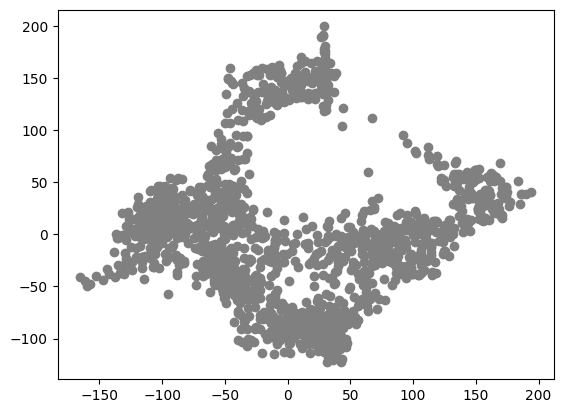

In [20]:

print("Reduced dataset shape:", X_reduced.shape)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], 
            c='gray')




/var/folders/v7/_tx6hlfs4ld_lypv8yt_49xh0000gp/T/ipykernel_42726/3610768924.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c=digits.target, cmap=plt.cm.get_cmap('viridis', 9))


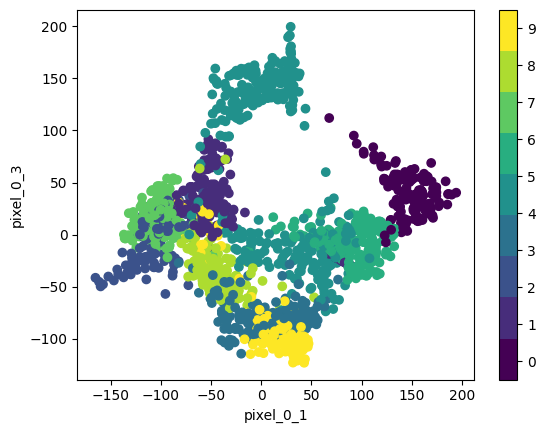

In [12]:


# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: digits.target_names[int(i)])

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], 
            c=digits.target, cmap=plt.cm.get_cmap('viridis', 9))

plt.xlabel(digits.feature_names[x_index])
plt.ylabel(digits.feature_names[y_index])
plt.colorbar(ticks=np.arange(10), format=formatter)
plt.clim(-0.5, 9.5)

supervised learning

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
print("X shape:", X.shape)        # must be (1797, 64)
print("y shape:", y.shape)  
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.8, random_state=42)
print(Xtrain.shape)   
print(ytrain.shape) 


X shape: (1797, 64)
y shape: (1797,)
(359, 64)
(359,)


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression( solver='sag')
clf.fit(Xtrain, ytrain)

/Users/daniele/kerasenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='sag')

In [26]:
from sklearn.metrics import accuracy_score
y_pred_train = clf.predict(Xtrain)
train_acc = accuracy_score(ytrain, y_pred_train)
print("Training accuracy:", train_acc)


y_pred_test = clf.predict(Xtest)
test_acc = accuracy_score(ytest, y_pred_test)
print("Test accuracy:", test_acc)

Training accuracy: 1.0
Test accuracy: 0.9401947148817803


Plot the confusion matrix 

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred_test)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[131   0   0   0   0   3   0   0   0   0]
 [  0 127  11   0   1   1   0   0   3   1]
 [  0   1 140   0   0   0   0   0   3   0]
 [  1   0   2 127   0   0   0   1  14   2]
 [  1   0   0   0 137   0   0   1   0   1]
 [  1   1   0   0   0 142   2   0   0   3]
 [  4   3   0   0   0   0 143   0   0   0]
 [  0   0   0   0   1   0   0 145   0   3]
 [  0   6   1   0   0   5   0   0 122   1]
 [  0   2   0   0   0   1   0   3   2 138]]


In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytrain, y_pred_train)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[44  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  0]
 [ 0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  0  0  0  0  0  0  0 39  0]
 [ 0  0  0  0  0  0  0  0  0 34]]
